<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/corrR_PTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### import data

In [2]:
x0 = [3.83, 4.22, 1.98, 1.81, 2.08, 3.07, 6.54, 1.62, 3.61, 2.37, 2.53, 1.87, 1.34, 0.99, 3.68, 1.82, 4.18, 0.76, 5.3, 1.29, 9.47, 0.77, 1.62, 4.23, 2, 1.5, 5.2, 1.61, 4.62, 4.74, 3.42]
y0 = [3.3, 4.3, 8, 17, 5.5, 6.5, 1.5, 5.5, 2.9, 4.4, 6.6, 6.6, 18.2, 51.5, 1.9, 4, 3.1, 2.4, 2, 4.5, 2.6, 3.3, 3.6, 3, 4.9, 7, 3, 9.4, 1.5, 2.9, 2.9] 

In [3]:
x1 = [3.52, 3.68, 2.68, 3.19, 3.12, 3.92, 7.7, 6.53, 5.32, 5.1, 5.18, 4.24, 4.27, 4.44, 3.94, 2.52, 2.22, 2.88, 3.59, 3.01, 3.13, 11.11, 4.5]
y1 = [10.3, 9.6, 18.6, 10.9, 3.5, 2.1, 4.3, 1.5, 1.6, 1.3, 2.9, 1.8, 3.3, 3, 2.6, 6.3, 6.8, 7.2, 3.2, 19.8, 15.6, 1.2, 4.9 ]

In [7]:
x, y = [], []
x = [*x0,*x1 ]
y = [*y0, *y1]

In [19]:
dt = []
data = pd.DataFrame(dt)
data['STD'] = x0
data['AC'] = y0

In [20]:
data.describe()

,STD,AC
count,31.000000,31.000000
mean,3.034516,6.574194
std,1.928101,9.190973
min,0.760000,1.500000
25%,1.620000,2.900000
50%,2.370000,4.000000
75%,4.200000,6.550000
max,9.470000,51.500000


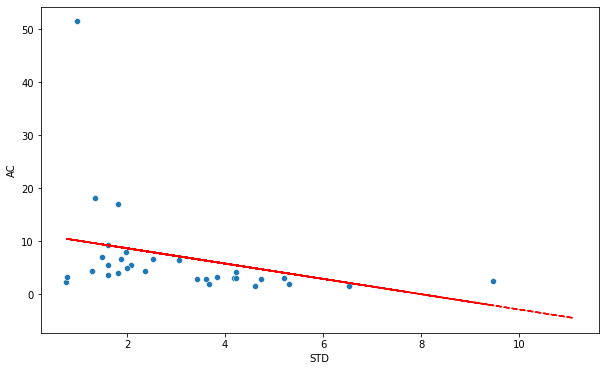

In [21]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(10,6))
sns.scatterplot(data=data, x="STD", y="AC")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()


In [22]:
np.correlate(x,y)

array([926.307])

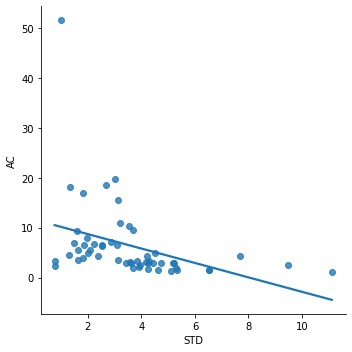

In [14]:
#fig, axs = plt.subplots(figsize=(10,6),dpi=300)
sns.lmplot(x='STD', y='AC', data=data, ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


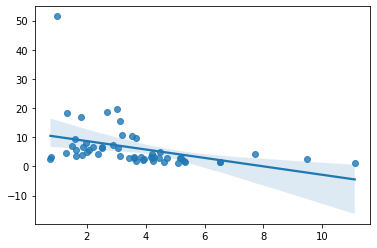

In [15]:
sns.regplot(x, y)

### Pearson correlation

In [26]:
from scipy.stats.stats import pearsonr

pearsonr(x, y)

(-0.37730618299516006, 0.004915545381186537)

### Spearman correlation

It epressed a correlation between two variables which does not depend on the outliers

In [17]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(x, y)
rho, p

(-0.6539349725758398, 8.235823707233343e-08)

Text(0.5, 1.0, 'Correlation AC Amplitude vs. STD')

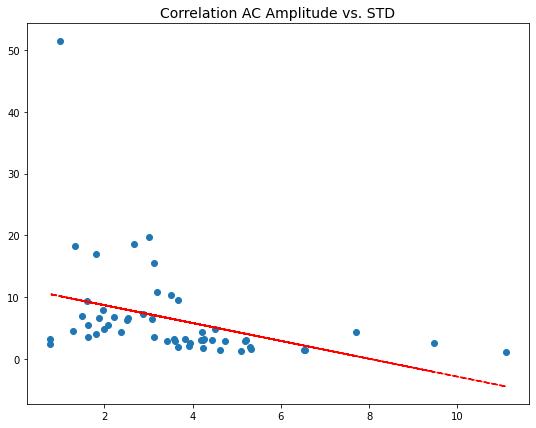

In [18]:
fig, ax = plt.subplots(1,1, figsize=(9, 7), sharex=True, sharey=True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#ax.plot(x,p(x),dashes=[10, 20])
ax.plot(x,p(x),"r--")
ax.scatter(x,y, marker='o')
#ax.plot(x, y)
ax.set_title('Correlation AC Amplitude vs. STD', fontsize=14)
